<h1> Questions I wanted to ask: </h1>
    <body> 
    1. What is the average cost of all cars?<br>
    2. What is the average cost of every car make?<br>
    3. What car model has the best 0-60?<br>
    4. What car make has the best 0-60 in comparison to price?<br>
    5. Is there a correlation between engine size and torque?<br>
    6. Which car make and model combination has the highest horsepower? <br>
    7. Is there a relationship between engine size and the 0-60 MPH time? <br>
    8. Can we identify any outliers in terms of price within specific car makes? <br>
    </body>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Sport car price.csv")
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')

<h1> The following is the average cost of all cars. </h1>

In [5]:
average_price = df['Price (in USD)'].mean()
average_price

382035.9414101291

<h1> The cost of all cars. </h1>

In [6]:
groups = df.groupby('Car Make')['Price (in USD)']
all_cars = groups.mean().sort_values()


Text(0, 0.5, 'Prices')

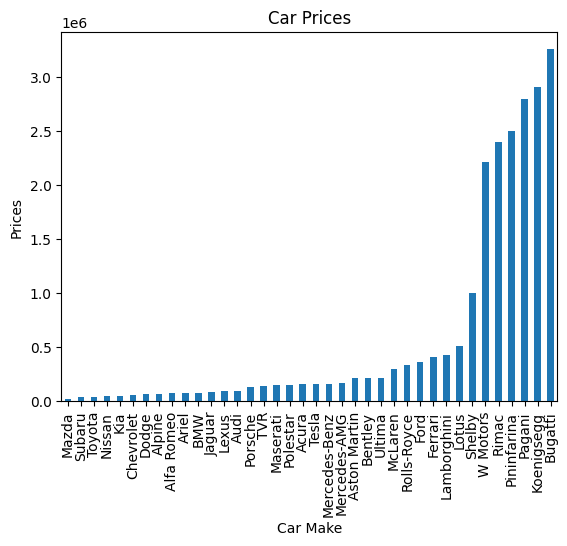

In [7]:
all_cars.plot(kind='bar')
plt.title("Car Prices")
plt.xlabel("Car Make")
plt.ylabel("Prices")

<h1> Getting the best 0-60 car </h1>

In [8]:
sorted = df.sort_values(by=['0-60 MPH Time (seconds)'])
sorted

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
439,Rimac,C_Two,2021,Electric,1914,1732,1.8,2400000
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,2400000
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,2400000
824,Rimac,Nevera,2021,Electric,1914,1696,1.85,2400000
986,Rimac,Nevera,2022,Electric,1914,1696,1.85,2400000
...,...,...,...,...,...,...,...,...
820,Jaguar,F-Type,2022,2,296,295,5.4,62500
13,Jaguar,F-Type,2022,3,296,295,5.4,70100
707,Dodge,Challenger,2022,3.6,305,268,6.4,28000
92,Mazda,MX-5 Miata,2021,2,181,151,6.5,26830


In [9]:
bestTime = sorted.iloc[0]
bestTime

Car Make                      Rimac
Car Model                     C_Two
Year                           2021
Engine Size (L)            Electric
Horsepower                     1914
Torque (lb-ft)                 1732
0-60 MPH Time (seconds)         1.8
Price (in USD)              2400000
Name: 439, dtype: object

<h1>What car make has the best horsepower in comparison to price?</h1>

In [16]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
price_weight = 0.99
time_weight = 0.01
df['combined_score'] = (price_weight * df['Price (in USD)']) + (time_weight * df['Horsepower'])  
best = df.sort_values(by = 'combined_score', ascending=True)
best.iloc[0]

Car Make                   Chevrolet
Car Model                     Camaro
Year                            2021
Engine Size (L)                  6.2
Horsepower                     455.0
Torque (lb-ft)                   455
0-60 MPH Time (seconds)            4
Price (in USD)                 25000
combined_score              24754.55
Name: 997, dtype: object

<h3> The numbers I'm getting is extremely interesting, so i'm going to plot price against horse power </h3>

Text(0, 0.5, 'Price')

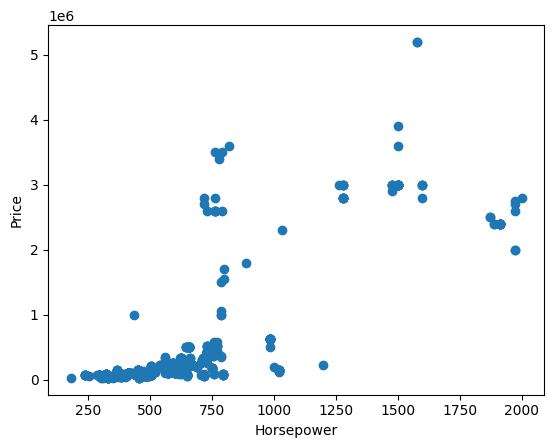

In [11]:
plt.scatter(df['Horsepower'], df['Price (in USD)'])
plt.xlabel("Horsepower")
plt.ylabel("Price")

<h3> Going to do regression analysis because this is an interesting relationship <h3>

In [12]:
df["Horsepower"].describe()

count     998.000000
mean      627.324649
std       299.973805
min       181.000000
25%       454.000000
50%       591.000000
75%       671.000000
max      2000.000000
Name: Horsepower, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df[['Horsepower']]
y = df['Price (in USD)']
model.fit(x, y) #oops

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#   Some null values
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  9
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
combined_score              9
dtype: int64

In [ ]:
df = df.dropna()

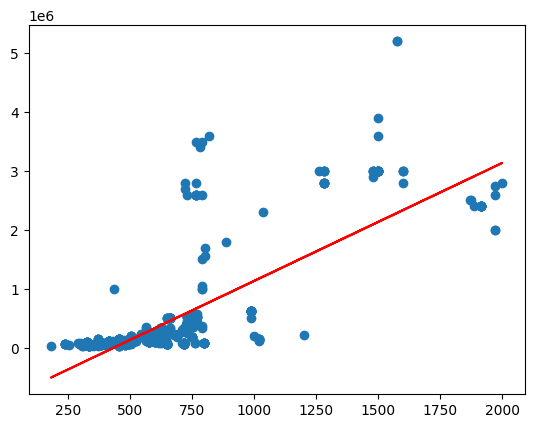

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df[['Horsepower']]
y = df['Price (in USD)']
model = model.fit(x, y)
intercept = model.intercept_
slope = model.coef_
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'red')

In [ ]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Horsepower'].corr(df['Price (in USD)'])

0.7977607693571174

<h3> There is a corrilation of 0.80 represents that there's a strong positive corrilation between price and horsepower </h3>

<h1>Is there a correlation between engine size and torque?</h1>

In [ ]:
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['Torque (lb-ft)'].corr(df['Engine Size (L)'])

0.6043204541650273

<h3> Torque and Engine size are moderately corrilated </h3>

In [ ]:
import statsmodels.api as sm
df = df.dropna()
x = df[['Engine Size (L)']]
y = df['Torque (lb-ft)']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
p_value = results.pvalues['Engine Size (L)']
'P-value:', p_value

('P-value:', 2.9913397560053598e-95)

<h3> Engine Size absolutely has a relationship with torque

<h1> Which car make and model combination has the highest horsepower? </h1>

In [ ]:
sorted = df.sort_values(by = ['Horsepower'])
sorted.iloc[0]

Car Make                        Mazda
Car Model                  MX-5 Miata
Year                             2021
Engine Size (L)                   2.0
Horsepower                      181.0
Torque (lb-ft)                  151.0
0-60 MPH Time (seconds)           6.5
Price (in USD)                  26830
Name: 92, dtype: object

Text(0, 0.5, 'Horse Power')

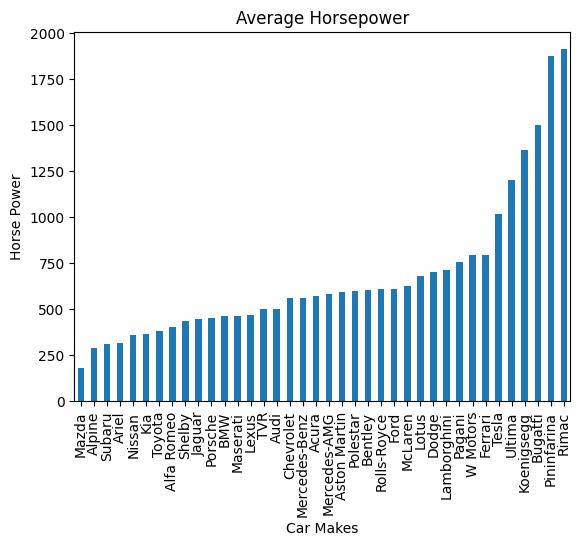

In [ ]:
groups = df.groupby('Car Make')['Horsepower']
groups.mean().sort_values().plot(kind='bar')
plt.title('Average Horsepower')
plt.xlabel('Car Makes')
plt.ylabel('Horse Power')

<h1>Is there a relationship between engine size and the 0-60 MPH time?</h1>

In [ ]:
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

In [ ]:
import statsmodels.api as sm
df = df.dropna()
x = df[['Engine Size (L)']]
y = df['0-60 MPH Time (seconds)']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
p_value = results.pvalues['Engine Size (L)']
'P-value:', p_value

('P-value:', 2.1079524803281336e-30)

<h2>There is a relationship between engine size and 0-60, so let's do regression analysis</h2>

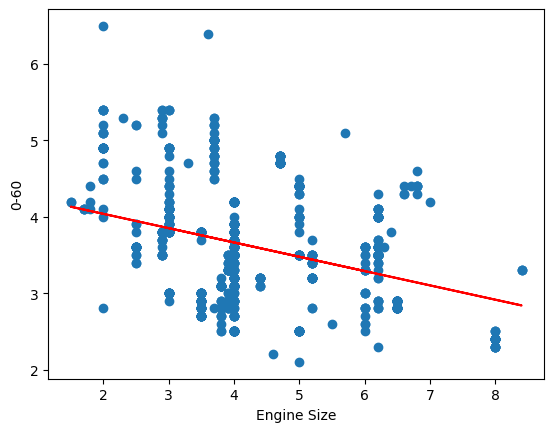

In [ ]:
model = LinearRegression()
model.fit(x,y)
intercept = model.intercept_
slope = model.coef_
y_pred = model.predict(x)
plt.scatter(x,y)
plt.xlabel("Engine Size")
plt.ylabel('0-60')
plt.plot(x, y_pred, color = 'red')

In [ ]:
print(slope[0], intercept)

-0.18744186894477882 4.41406788722529


<h1>Can we identify any outliers in terms of price within specific car makes?</h1>

In [ ]:
#   How do I do this? Imma just use Z scores honestly
df['Z_Score'] = (df['Price (in USD)'] - df['Price (in USD)'].mean()) / df['Price (in USD)'].std()
outliers = df[abs(df['Z_Score']) >= 3]
'There are ' + str(len(outliers)) + ' outlires in ' +str(len(df)) + ' cars'

'There are 51 outlires in 946 cars'

<h3> The following are the outlires </h3>

In [ ]:
outliers

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Z_Score
11,Bugatti,Chiron,2021,8.0,1500.0,1180.0,2.4,3000000,3.876311
14,Koenigsegg,Jesko,2021,5.0,1280.0,1015.0,2.5,2800000,3.584847
24,Pagani,Huayra,2021,6.0,720.0,737.0,2.8,2800000,3.584847
85,Bugatti,Chiron,2022,8.0,1500.0,1180.0,2.4,3000000,3.876311
88,Koenigsegg,Jesko,2022,5.0,1600.0,1106.0,2.5,3000000,3.876311
95,Pagani,Huayra,2022,6.0,764.0,738.0,2.8,2800000,3.584847
113,Bugatti,Chiron,2021,8.0,1500.0,1180.0,2.4,3000000,3.876311
158,Bugatti,Chiron,2021,8.0,1500.0,1180.0,2.4,3000000,3.876311
161,Koenigsegg,Jesko,2022,5.0,1600.0,1106.0,2.5,3000000,3.876311
166,Pagani,Huayra,2020,6.0,720.0,738.0,3.0,2700000,3.439115
